In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
# load and read dataset into dataframe
diabetes_df = pd.read_csv('/content/diabetes.csv')
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
# defining feature matrix and target vector
# features are from OG dataframe
X = diabetes_df.iloc[:, 1:]
print(X)
# target is from OG dataset (target column)
y = diabetes_df['Diabetes_binary']
print(y)


       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         1.0       0.0        1.0  26.0     0.0     0.0   
1         1.0       1.0        1.0  26.0     1.0     1.0   
2         0.0       0.0        1.0  26.0     0.0     0.0   
3         1.0       1.0        1.0  28.0     1.0     0.0   
4         0.0       0.0        1.0  29.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
70687     0.0       1.0        1.0  37.0     0.0     0.0   
70688     0.0       1.0        1.0  29.0     1.0     0.0   
70689     1.0       1.0        1.0  25.0     0.0     0.0   
70690     1.0       1.0        1.0  18.0     0.0     0.0   
70691     1.0       1.0        1.0  25.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     0.0      1.0  ...   
1                       0.0           0.0     1.0      0.0  ...   
2                       0.0           1.0     1.0      1.0  ...   
3          

In [4]:
# Splitting data into training and test datasets
# setting random_state in order to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [5]:
# Standardize the features (decide whether to use or no)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# cross-validation to find best k
from sklearn.model_selection import cross_val_score
k_values = [i for i in range(1,31)]
scores = []

# create KNN model based on each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))


In [7]:
# find the best k value based on best score
best_index = np.argmax(scores)
best_k = k_values[best_index]
print("Best K-value based on Cross-Validation: ", best_k)

Best K-value based on Cross-Validation:  29


In [8]:
# create and fit model with best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [9]:
# predict y values using KNN model
y_pred = knn.predict(X_test)

In [10]:
# Evaluation metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1_score)
print("ROC-AUC Score: ", roc_auc)

print()

report = metrics.classification_report(y_test, y_pred)
print("Classification Report: \n", report)

Accuracy:  0.7372828608612007
Precision:  0.7168525402726146
Recall:  0.7850277055297976
F1 Score:  0.7493927781076267
ROC-AUC Score:  0.7372477145995534

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      8830
         1.0       0.72      0.79      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



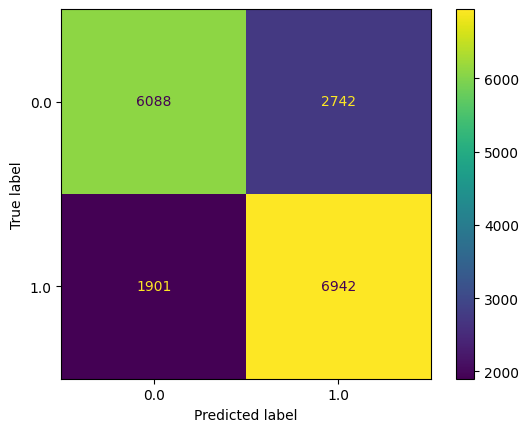

In [11]:
# visualizing confusion matrix
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [12]:
# hyperparameter tuning with GridSearch
param_grid = {'n_neighbors': k_values}

knn2 = KNeighborsClassifier()

knn_grid_search = GridSearchCV(knn2, param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

best_param = knn_grid_search.best_params_['n_neighbors']
best_score = knn_grid_search.best_score_

In [13]:
print("Best K- value based on Grid Search: ", best_param)
print("Best score value: ", best_score)

Best K- value based on Grid Search:  29
Best score value:  0.7384145477001253


In [14]:
# creating the KNN model based on tuned hyperparameter
knn3 = KNeighborsClassifier(n_neighbors=best_param)
# fitting the updated model
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=29)

In [15]:
# predicting y values
y_pred2 = knn3.predict(X_test)

In [16]:
# Evaluation for updated model
accuracy = metrics.accuracy_score(y_test, y_pred2)
precision = metrics.precision_score(y_test, y_pred2)
recall = metrics.recall_score(y_test, y_pred2)
f1_score = metrics.f1_score(y_test, y_pred2)
roc_auc = metrics.roc_auc_score(y_test, y_pred2)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 Score: ', f1_score)
print('ROC AUC: ', roc_auc)
print()
report = metrics.classification_report(y_test, y_pred2)
print('Classification Report: \n', report)

Accuracy:  0.7372828608612007
Precision:  0.7168525402726146
Recall:  0.7850277055297976
F1 Score:  0.7493927781076267
ROC AUC:  0.7372477145995534

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.72      8830
         1.0       0.72      0.79      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673

